In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    print(f"Dispositivo encontrado: {gpu}")

Dispositivo encontrado: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [4]:
df = pd.read_json('./src/data/repositories_2010_to_2014.json')

In [5]:
df.sample(3)

,id,name,full_name,owner,stargazers_count,forks_count,watchers_count,open_issues_count,topics,created_at,language,has_issues,has_projects,has_downloads,has_discussions,has_wiki,license,score
20614,374442233,IMDB-DA,MahmoudElMahdi/IMDB-DA,"{'login': 'MahmoudElMahdi', 'id': 61700122, 'n...",0,0,0,0,"[data, data-analysis, data-science, data-visua...",2021-06-06 19:04:52+00:00,HTML,True,True,True,False,True,None,1
24198,435573069,astro-sdk,astronomer/astro-sdk,"{'login': 'astronomer', 'id': 12449437, 'node_...",356,45,356,183,"[airflow, apache-airflow, bigquery, dags, data...",2021-12-06 16:43:50+00:00,Python,True,False,True,True,False,"{'key': 'apache-2.0', 'name': 'Apache License ...",1
37773,673334519,uace-analysis,MickFrog/uace-analysis,"{'login': 'MickFrog', 'id': 107855646, 'node_i...",1,1,1,0,"[data, data-science, data-visualization, foliu...",2023-08-01 11:53:40+00:00,Jupyter Notebook,True,True,True,False,True,None,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48774 entries, 0 to 48773
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   id                 48774 non-null  int64              
 1   name               48774 non-null  object             
 2   full_name          48774 non-null  object             
 3   owner              48774 non-null  object             
 4   stargazers_count   48774 non-null  int64              
 5   forks_count        48774 non-null  int64              
 6   watchers_count     48774 non-null  int64              
 7   open_issues_count  48774 non-null  int64              
 8   topics             48774 non-null  object             
 9   created_at         48774 non-null  datetime64[ns, UTC]
 10  language           43891 non-null  object             
 11  has_issues         48774 non-null  bool               
 12  has_projects       48774 non-null  bool       

| **Columna**            | **Descripción**                                                                                                  | **dtype** |
|------------------------|------------------------------------------------------------------------------------------------------------------|-----------|
| `id`                   | El identificador único del repositorio.                                                                          |     int64      |
| `name`                 | El nombre del repositorio.                                                                                       |      object    |
| `full_name`            | El nombre completo del repositorio, incluyendo el nombre del propietario.                                        |     object     |
| `owner`                | Un objeto que contiene información sobre el propietario del repositorio                                          |     object     |
| `stargazers_count`     | El número de estrellas (stars) que el repositorio ha recibido.                                                   |     int64      |
| `forks_count`          | El número de forks (copias) realizadas a partir del repositorio.                                                 |     int64      |
| `watchers_count`       | El número de observadores que están siguiendo las actividades del repositorio.                                   |     int64      |
| `open_issues_count`    | El número de problemas (issues) abiertos en el repositorio.                                                      |    int64       |
| `topics`               | Una lista de temas y palabras clave asociados al repositorio.                                                    |      object    |
| `created_at`           | La fecha y hora en que el repositorio fue creado.                                                                | datetime64[ns, UTC]|
| `language`             | El principal lenguaje de programación utilizado en el repositorio.                                               |      object   |
| `has_issues`           | Valor que indica si el repositorio tiene issues (problemas) habilitados.                                         |        bool   |
| `has_projects`         | Valor que indica si el repositorio tiene proyectos habilitados.                                                  |      bool     |
| `has_downloads`        | Valor que indica si el repositorio permite la descarga de archivos.                                              |       bool    |
| `has_discussions`      | Valor que indica si el repositorio tiene discusiones habilitadas.                                                |      bool     |
| `has_wiki`             | Valor que indica si el repositorio tiene una wiki habilitada.                                                    |      bool     |
| `license`              | El tipo de licencia bajo la cual el repositorio está disponible.                                                 |      object   |
| `score`                | Un valor numérico (0-1) que representa la relevancia de un repositorio en los resultados de una búsqueda.         |     int64    |

In [6]:
# Creando diccionário com cada topic = clave e su conteo = valor, ordenado descendente

all_topics = []
for topics_list in df['topics']:
    all_topics.extend(topics_list)

topic_counts = {}
for topic in all_topics:
    if topic in topic_counts:
        topic_counts[topic] += 1
    else:
        topic_counts[topic] = 1

sorted_topic_counts = dict(sorted(topic_counts.items(), key=lambda x: x[1], reverse=True))

print(sorted_topic_counts)

{'data-science': 48727, 'machine-learning': 19867, 'python': 19366, 'data-analysis': 8539, 'data-visualization': 7892, 'pandas': 5332, 'jupyter-notebook': 3806, 'deep-learning': 3731, 'python3': 3371, 'data': 3068, 'r': 2969, 'numpy': 2724, 'matplotlib': 2186, 'statistics': 2000, 'machine-learning-algorithms': 1912, 'artificial-intelligence': 1847, 'scikit-learn': 1766, 'sql': 1682, 'exploratory-data-analysis': 1554, 'seaborn': 1494, 'data-mining': 1453, 'classification': 1412, 'visualization': 1329, 'nlp': 1328, 'ai': 1208, 'data-analytics': 1145, 'eda': 1107, 'sklearn': 1020, 'analytics': 1012, 'tensorflow': 1004, 'random-forest': 999, 'linear-regression': 999, 'kaggle': 998, 'database': 985, 'streamlit': 971, 'data-engineering': 948, 'logistic-regression': 940, 'natural-language-processing': 920, 'dataset': 916, 'neural-network': 897, 'regression': 897, 'ml': 831, 'machinelearning': 820, 'data-cleaning': 781, 'datascience': 766, 'computer-vision': 766, 'analysis': 752, 'clustering':

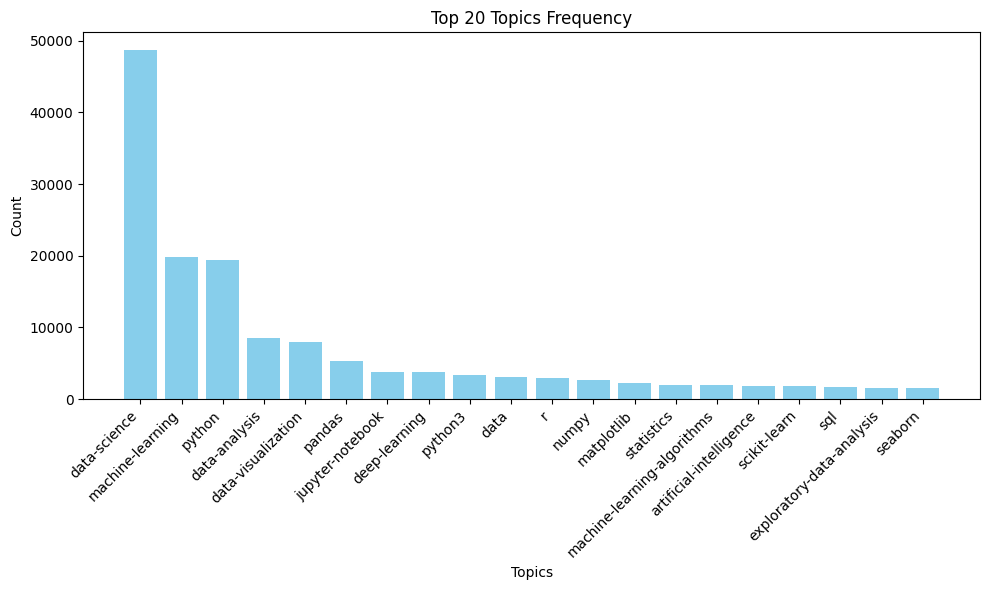

In [12]:
top_20_topics = dict(list(sorted_topic_counts.items())[:20])

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_20_topics.keys(), top_20_topics.values(), color='skyblue')

# Adicionar título e rótulos
plt.title('Top 20 Topics Frequency')
plt.xlabel('Topics')
plt.ylabel('Count')

# Rotacionar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45, ha='right')

# Mostrar o gráfico
plt.tight_layout()  # Ajusta os elementos do gráfico para não cortarem
plt.show()

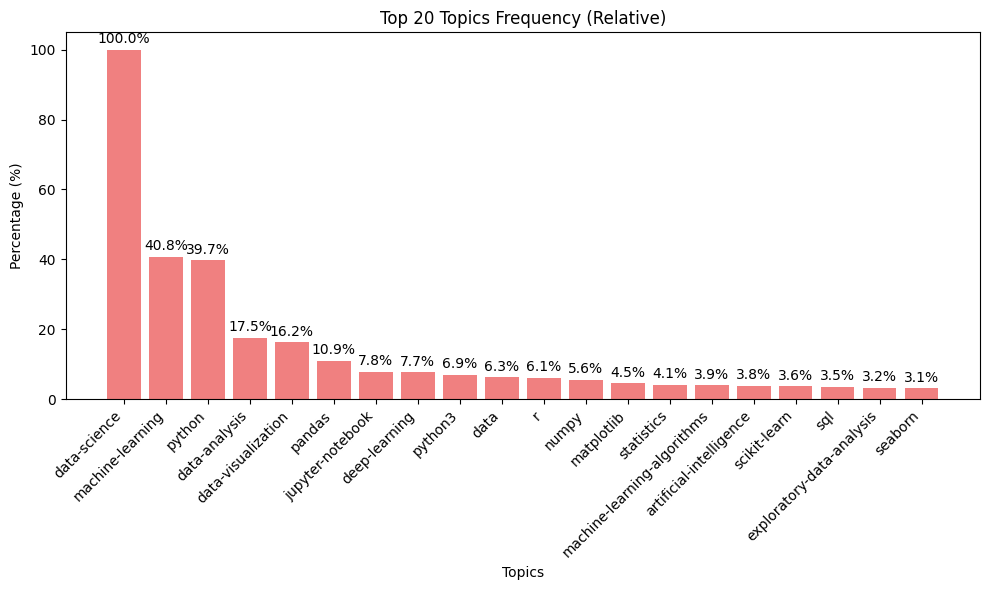

In [13]:
max_count = max(top_20_topics.values())
relative_topic_counts = {topic: (count / max_count) * 100 for topic, count in top_20_topics.items()}

plt.figure(figsize=(10, 6))
plt.bar(relative_topic_counts.keys(), relative_topic_counts.values(), color='lightcoral')

# Adicionar título e rótulos
plt.title('Top 20 Topics Frequency (Relative)')
plt.xlabel('Topics')
plt.ylabel('Percentage (%)')

plt.xticks(rotation=45, ha='right')

for i, value in enumerate(relative_topic_counts.values()):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [21]:
df['year'] = df['created_at'].dt.year  # Extrair o ano da coluna 'created_at'

# Inicializar um único dicionário para armazenar os dicionários de cada ano
yearly_top_topics = {}

# Agrupar os dados por ano
for year, group in df.groupby('year'):
    # Desempacotar as listas de tópicos para o grupo atual
    all_topics = []
    for topics_list in group['topics']:
        all_topics.extend(topics_list)  # Adicionar todos os tópicos ao lista
    
    # Contar a frequência de cada tópico manualmente
    topic_counts = {}
    for topic in all_topics:
        if topic in topic_counts:
            topic_counts[topic] += 1
        else:
            topic_counts[topic] = 1

    # Ordenar o dicionário pela contagem em ordem decrescente
    sorted_topic_counts = dict(sorted(topic_counts.items(), key=lambda x: x[1], reverse=True))

    # Selecionar os 20 tópicos mais frequentes
    top_20_topics = dict(list(sorted_topic_counts.items())[:20])

    # Armazenar o resultado no dicionário principal
    yearly_top_topics[year] = top_20_topics

# Exibir o único dicionário com todos os anos e tópicos
print(yearly_top_topics.keys())
print(yearly_top_topics.values())

dict_keys([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])
dict_values([{'data-science': 4, 'python': 4, 'data-analysis': 2, 'closember': 1, 'hacktoberfest': 1, 'ipython': 1, 'jupyter': 1, 'notebook': 1, 'repl': 1, 'spec-0': 1, 'big-data': 1, 'brain-imaging': 1, 'brainweb': 1, 'dataflow': 1, 'dataflow-programming': 1, 'neuroimaging': 1, 'workflow-engine': 1, 'machine-learning': 1, 'statistics': 1, 'alignment': 1}, {'data-science': 13, 'python': 7, 'machine-learning': 3, 'data-analysis': 3, 'data-visualization': 2, 'artificial-intelligence': 2, 'c-plus-plus': 2, 'cmake': 2, 'swig': 2, 'visualization': 2, 'data': 2, 'gtk': 1, 'matplotlib': 1, 'plotting': 1, 'qt': 1, 'tk': 1, 'wx': 1, 'data-mining': 1, 'document-similarity': 1, 'fasttext': 1}, {'data-science': 19, 'python': 8, 'statistics': 5, 'javascript': 3, 'fedora-project': 2, 'message-bus': 2, 'zeromq': 2, 'wikidata': 2, 'socr': 2, 'julia': 2, 'data-visualization': 2, 'visualization': 2, 'ap

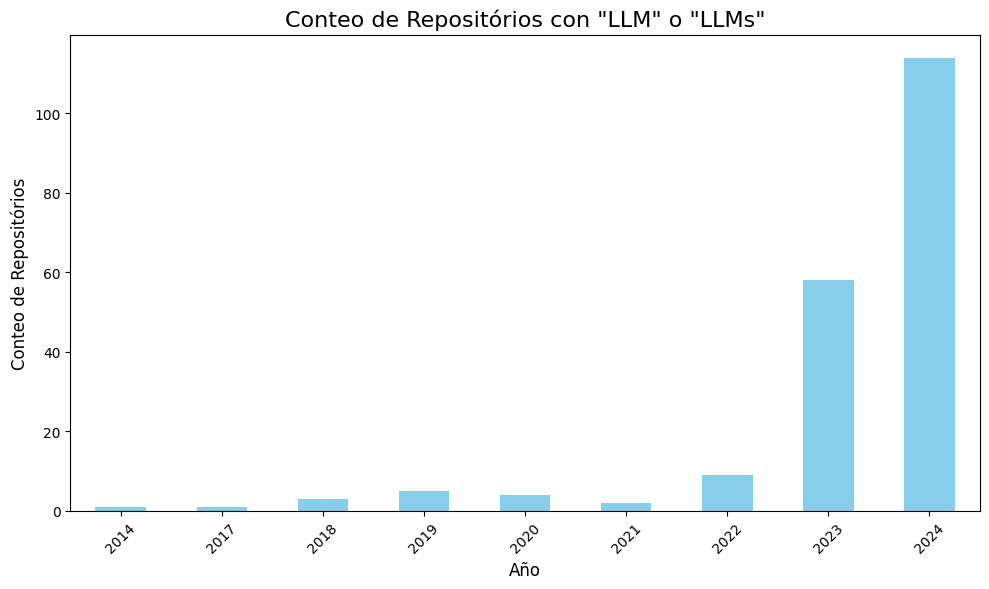

In [31]:
# Filtrar os repositórios que contêm os tópicos "LLM" ou "LLMs"
llm_repositories = df[df['topics'].apply(lambda topics: 'llm' in topics or 'llms' in topics)]

# Agrupar por ano e contar o número de repositórios com esses tópicos
llm_by_year = llm_repositories.groupby('year').size()

# Plotar o gráfico de barras
llm_by_year.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Conteo de Repositórios con "LLM" o "LLMs"', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Conteo de Repositórios', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
empty_topics = df[df['topics'].apply(lambda x: x == [])]

# Exibe apenas a coluna 'full_name' das linhas com listas vazias em 'topics'
print(empty_topics[['id','full_name']])

              id                                          full_name
28759  520273044                               Oxen-AI/oxen-release
28771  520238200  AhmedUZaki/Eng.-Mohamed-Hammad-AI-Recommendations
28836  520197073               teamdatatonic/rl-agent-playing-catch
28843  520265422                           albertiaedev/cheatsheets
41606  750847305                              latitude-dev/latitude
41607  749049312  lzz19980125/awesome-time-series-segmentation-p...
41609  751135933                            godaai/llm-table-survey
41610  744634700   questdb/time-series-streaming-analytics-template
41613  748935547                   RamiKrispin/sdsu-docker-workshop
41615  740929773    Mindinventory/Bank-Marketing-Data-Visualisation
41616  748661381         simranjeet97/75DayHard_GenAI_LLM_Challenge
41618  745017882                         Extremesarova/ds_resources
41619  747899678                                    antl3x/codeplot
41626  748386702                         SaM-92/